In [4]:
import numpy as np
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


Covariance matrix:
[[ 0.95776187  0.87513534  2.79065908]
 [ 0.87513534  9.74095763 11.49122831]
 [ 2.79065908 11.49122831 17.07254647]]

Eigenvalues:
[ 2.57780200e+01+0.j -1.35927322e-15+0.j  1.99324602e+00+0.j]

Eigenvectors:
[[-0.11105573 -0.81649658  0.56656858]
 [-0.58284624 -0.40824829 -0.70258352]
 [-0.80495769  0.40824829  0.43055365]]

Weight of first eigenvalue: 0.9282263177204783

Weight of second eigenvalue: 0.07177368227952172

Pricipal components weight: 1.0


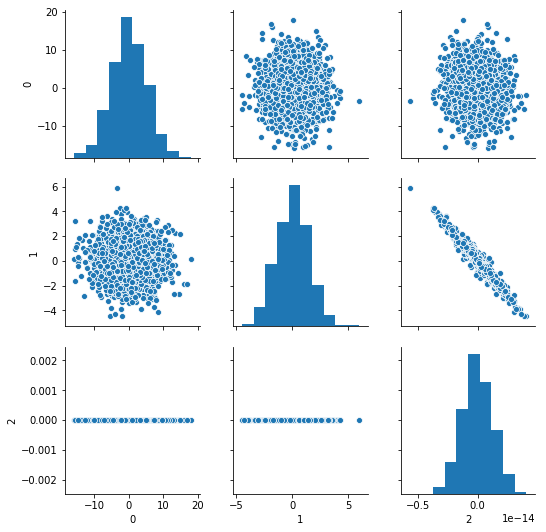

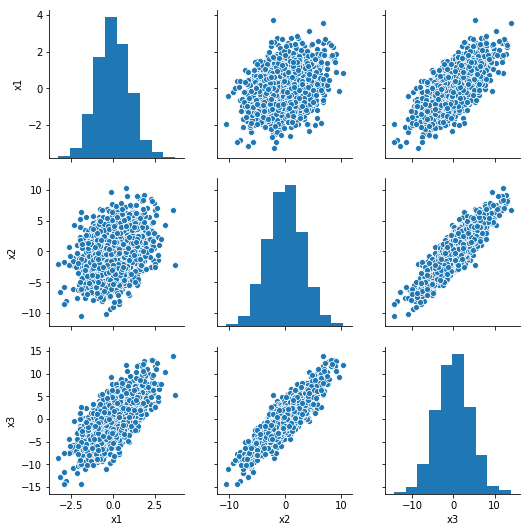

In [13]:
N = 2000

x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1 + x2

datas = {'x1': x1, 'x2': x2, 'x3': x3}
dat = pd.DataFrame(datas)

data = np.array([x1,x2,x3])

print('Covariance matrix:')
print(np.cov(data))

l, V = la.eig(np.cov(data))
print()
print('Eigenvalues:')
print(l)
print()
print('Eigenvectors:')
print(V)
print()
U, spectrum, Vt = la.svd(np.cov(data))

### the two procedures lead to the same result in two out of three cases; the smallest eigenvalue is different. However,
### such diffference may be caused by the finite precision

print('Weight of first eigenvalue:', spectrum[0]/spectrum.sum())
print()
print('Weight of second eigenvalue:', spectrum[1]/spectrum.sum())
print()
print('Pricipal components weight:', (spectrum[1] + spectrum[0])/spectrum.sum())

### total variability is caused pretty much entirely by the first two components. Noting that 


thresh = 0.99
i=0
while (spectrum[:i].sum())/(spectrum.sum())<.99:
    i+=1
    
    
'''
spectrum[i:]=0
print(spectrum)

#rebuilding the original matrix

spectre = np.diag(spectrum)

pcov = np.dot(U,np.dot(spectre, Vt))
#pcov_1 = np.dot(U,np.dot(spectre, U.T))
print()
print(pcov)
print()
#print(pcov_1)
'''

#data rotation
datar = np.dot(Vt, data)
pd.DataFrame(datar)


dataclean = datar[:i]

pd.DataFrame(dataclean)


#fig = plt.figure(figsize=(15,15))
#ax = fig.add_subplot(1, 1, 1)
#ax.
#g = sns.PairGrid(pd.DataFrame(datar.T)).map(plt.scatter)
g = sns.pairplot(pd.DataFrame(datar.T))
a = sns.pairplot(pd.DataFrame(dat))

2\. **PCA on a nD dataset**

Start from the dataset you have generated in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standard deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before


Eigenvalues:
[ 2.77107265e+01+0.j  2.19612823e+00+0.j -4.32776239e-16+0.j
  4.39880390e-04+0.j  3.52877730e-04+0.j  3.65412324e-04+0.j
  4.27892546e-04+0.j  4.21115054e-04+0.j  4.15478351e-04+0.j
  4.06473361e-04+0.j  3.93870132e-04+0.j  3.85925874e-04+0.j
  3.87562471e-04+0.j]

Eigenvectors:
[[-1.15939680e-01 -5.65589168e-01 -8.16496581e-01  1.93921191e-04
   3.99021522e-05 -2.74264634e-04  1.24948440e-04 -6.38635228e-05
  -1.62711601e-04  1.13835142e-04  4.24855952e-05  7.26196905e-05
   1.90746640e-04]
 [-5.76762959e-01  7.07585602e-01 -4.08248290e-01 -3.08407393e-04
  -1.17507925e-04  4.09380096e-04 -1.22480491e-04  5.29440018e-05
   2.40702186e-04 -1.10956386e-05  2.12205616e-05 -6.21995006e-05
  -2.87226241e-04]
 [-8.08642318e-01 -4.23592735e-01  4.08248290e-01  7.94349892e-05
  -3.77036211e-05 -1.39149172e-04  1.27416389e-04 -7.47830438e-05
  -8.47210157e-05  2.16574645e-04  1.06191752e-04  8.30398804e-05
   9.42670399e-05]
 [ 1.91887043e-04 -1.02107169e-04 -1.69026884e-16  1.9

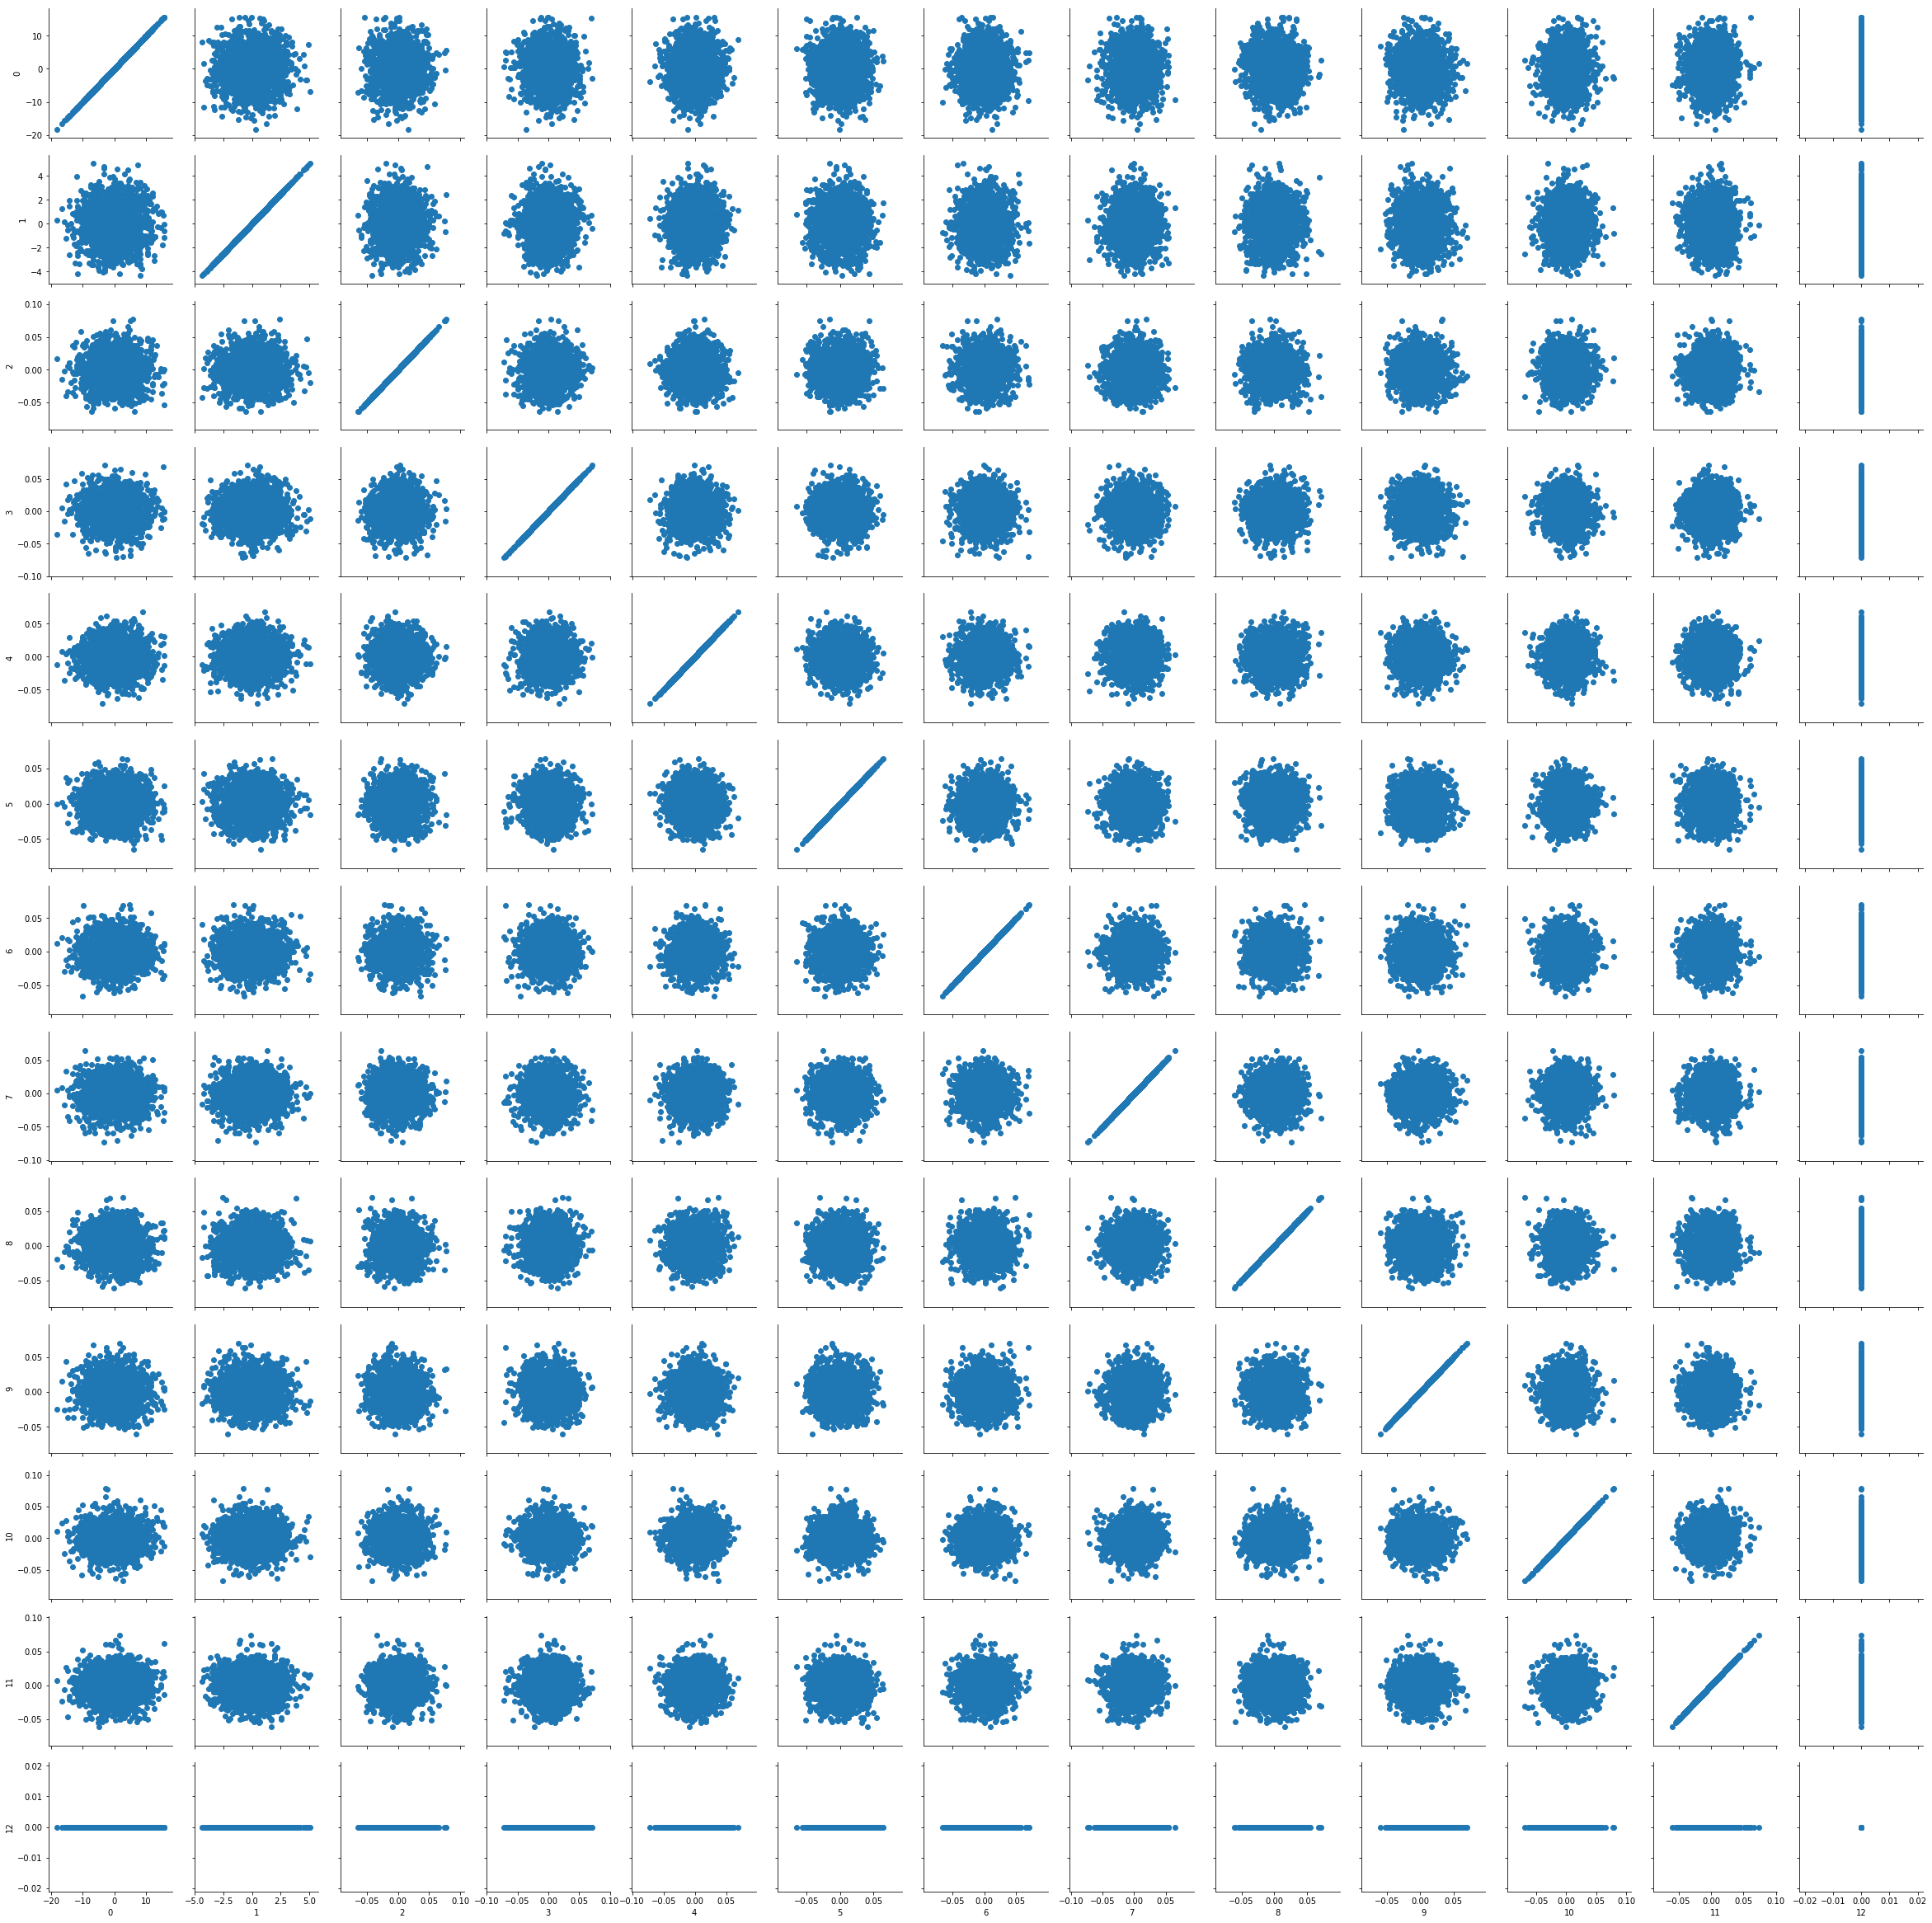

In [11]:
sigma = 1/50


x4 = np.random.normal(0,sigma,N)
x5 = np.random.normal(0,sigma,N)
x6 = np.random.normal(0,sigma,N)
x7 = np.random.normal(0,sigma,N)
x8 = np.random.normal(0,sigma,N)
x9 = np.random.normal(0,sigma,N)
x10 = np.random.normal(0,sigma,N)
x11 = np.random.normal(0,sigma,N)
x12 = np.random.normal(0,sigma,N)
x13 = np.random.normal(0,sigma,N)


data = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13])



#print('Covariance matrix:')
#print(np.cov(data))

l, V = la.eig(np.cov(data))
print()
print('Eigenvalues:')
print(l)
print()
print('Eigenvectors:')
print(V)
print()
U, spectrum, Vt = la.svd(np.cov(data))

thresh = 0.99
i=0
while (spectrum[:i].sum())/(spectrum.sum())<.99:
    i+=1
    
print("The threshold is reached by summing the first ", i, "eigenvalues.\n")

#data rotation
datar = np.dot(Vt, data)
pd.DataFrame(datar)


dataclean = datar[:i]

pd.DataFrame(dataclean)


#fig = plt.figure(figsize=(15,15))
#ax = fig.add_subplot(1, 1, 1)
#ax.
g = sns.PairGrid(pd.DataFrame(datar.T)).map(plt.scatter)


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [ ]:
def rotation(r, theta, phi):
    a = r
    a[0] = np.absolute(r)*np.cos(phi)*np.sin(theta)
    a[1] = np.absolute(r)*np.sin(phi)*np.sin(theta)
    a[2] = np.absolute(r)*np.cos(theta)
    return a

    
n = 5 #number of cameras
N = 1000 #number of recordings

#simulation of spring -> harmonic oscillator with brownian noise
    
    
    
    
    

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset